$$ Deep \space Learning $$
$$ Credit\space Score \space ANN $$

# Introduction

> Use the `keras` from Tensorflow to build ANN model that would fit the credit score data and be able to generalize well.

Use the Credit Score Classification dataset provided [here](https://www.kaggle.com/datasets/parisrohan/credit-score-classification) to train and test your design.

**Notes:**
- Split the data as you see fit and use validation during training.
- You may re-use the EDA, data preparation, and other sections you previously used in ML1 assignemnts.
- Remember that you can use classification metrics from other libraries as well (e.g., `sklearn`)
- Plot the loss, and accuracy against epochs and extract insights on how well of a fit your model is.
- This time the notebook is not prepared with sections and instructions so that you can do it yourself.
- If you are stuck, you can consult the [Keras User Guide](https://keras.io/api/). There are some useful [Code Examples](https://keras.io/examples/) as well.


**Task:**

- A global finance company with years of accumulated banking and credit-related data is seeking to develop an intelligent system. The goal is to automate the classification of individuals into credit score categories, reducing manual effort and improving efficiency.

- Given a person’s credit-related information, build a machine learning model that can classify the credit score.

**About Dataset**

- **Age**: Represents the age of the person  
- **Annual_Income**: Represents the annual income of the person  
- **Monthly_Inhand_Salary**: Represents the monthly base salary of a person  
- **Num_Bank_Accounts**: Represents the number of bank accounts a person holds  
- **Num_Credit_Card**: Represents the number of other credit cards held by a person  
- **Interest_Rate**: Represents the interest rate on credit card (percent)  
- **Num_of_Loan**: Represents the number of loans taken from the bank  
- **Delay_from_due_date**: Represents the average number of days delayed from the payment date (days)  
- **Num_of_Delayed_Payment**: Represents the average number of payments delayed by a person  
- **Changed_Credit_Limit**: Represents the percentage change in credit card limit (percent)  
- **Num_Credit_Inquiries**: Represents the number of credit card inquiries  
- **Credit_Mix**: Represents the classification of the mix of credits (Bad, Standard, Good)  
- **Outstanding_Debt**: Represents the remaining debt to be paid  
- **Credit_Utilization_Ratio**: Represents the utilization ratio of credit card (percent)  
- **Credit_History_Age**: Represents the age of credit history of the person (days)  
- **Payment_of_Min_Amount**: Represents whether only the minimum amount was paid by the person  
- **Total_EMI_per_month**: Represents the monthly EMI payments  
- **Amount_invested_monthly**: Represents the monthly amount invested by the customer  
- **Monthly_Balance**: Represents the monthly balance amount of the customer  
- **Credit_Score**: Represents the bracket of credit score (Poor, Standard, Good)  


# `01` Import Necessary Libraries

## `i` Default Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

----------------------------

# `02` Load & Split Data

Note: Make sure the `Data` folder attached with the notebook is in the same path for this cell to work properly.

[Dataset Link](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)

In [5]:
data = pd.read_csv('dataBases/Credit_Score_train.csv')
data.head()

/tmp/ipykernel_69966/103475861.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataBases/Credit_Score_train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Split data via the method you see fit to ensure that you can estimate the generalization error.

In [6]:
train_valid_data, test_data = train_test_split(data, test_size=0.2, random_state=1234)
train_data, valid_data = train_test_split(train_valid_data, test_size=0.2, random_state=1234)

In [7]:
train_data_original = train_data.copy()
valid_data_original = valid_data.copy()
test_data_original = test_data.copy()   

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Notes:`
- Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64000 entries, 41919 to 25475
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        64000 non-null  object 
 1   Customer_ID               64000 non-null  object 
 2   Month                     64000 non-null  object 
 3   Name                      57564 non-null  object 
 4   Age                       64000 non-null  object 
 5   SSN                       64000 non-null  object 
 6   Occupation                64000 non-null  object 
 7   Annual_Income             64000 non-null  object 
 8   Monthly_Inhand_Salary     54344 non-null  float64
 9   Num_Bank_Accounts         64000 non-null  int64  
 10  Num_Credit_Card           64000 non-null  int64  
 11  Interest_Rate             64000 non-null  int64  
 12  Num_of_Loan               64000 non-null  object 
 13  Type_of_Loan              56664 non-null  object 
 14  Delay_f

In [9]:
train_data.duplicated().sum()

np.int64(0)

In [10]:
train_data.isnull().sum() 

ID                             0
Customer_ID                    0
Month                          0
Name                        6436
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       9656
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                7336
Delay_from_due_date            0
Num_of_Delayed_Payment      4485
Changed_Credit_Limit           0
Num_Credit_Inquiries        1261
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          5780
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2870
Payment_Behaviour              0
Monthly_Balance              757
Credit_Score                   0
dtype: int64

In [11]:
train_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,54344.000000,64000.000000,64000.000000,64000.000000,64000.000000,62739.000000,64000.000000,64000.000000
mean,4189.977267,17.163484,22.458672,72.596641,21.092344,27.844945,32.284360,1386.545180
std,3183.396223,118.222030,129.047004,468.312666,14.861313,193.365007,5.123238,8226.664392
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.100770,0.000000
25%,1620.372708,3.000000,4.000000,8.000000,10.000000,3.000000,28.040380,30.015880
50%,3090.332500,6.000000,6.000000,13.000000,18.000000,6.000000,32.323633,69.246684
75%,5950.426667,7.000000,7.000000,20.000000,28.000000,9.000000,36.505625,160.528078
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,49.522324,82256.000000


In [12]:
train_data.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
41919,0x10b9d,CUS_0x7ad7,August,Lawderu,44,398-13-1916,Journalist,17728.55,NaN,3,...,Standard,1493.28,23.680638,7 Years and 10 Months,Yes,63.722011,108.05997315858444,Low_spent_Small_value_payments,274.755932971368,Standard
68150,0x1a550,CUS_0x757,July,Holtonr,32,658-55-0822,Accountant,48276.66,4036.380342,6,...,Standard,945.79,28.841019,29 Years and 2 Months,No,252.798697,39.7137572770399,High_spent_Large_value_payments,471.7677042913908,Standard
4308,0x2f3e,CUS_0x6b42,May,Clarkp,26,471-99-1392,Media_Manager,18503.85,1634.987500,3,...,Standard,742.33,35.810230,16 Years and 3 Months,Yes,77.240964,98.9453704707892,Low_spent_Small_value_payments,277.3124156805069,Poor
52490,0x14990,CUS_0x7ef7,March,Douwe Miedemar,29,124-45-4455,Entrepreneur,30411.9,2772.325000,845,...,_,2261.01,33.064260,8 Years and 3 Months,NM,112.753434,69.24369593443768,High_spent_Small_value_payments,355.23536981941095,Poor
83004,0x1fc5a,CUS_0x6735,May,illp,36,032-19-7586,Teacher,50473.8,4144.150000,3,...,Standard,1316.91,39.605763,NaN,Yes,199.605722,NaN,High_spent_Medium_value_payments,408.80651326453074,Standard


In [13]:
percent_missing_per_col = (train_data.isnull().sum() / train_data.shape[0]) * 100
percent_missing_per_col

ID                           0.000000
Customer_ID                  0.000000
Month                        0.000000
Name                        10.056250
Age                          0.000000
SSN                          0.000000
Occupation                   0.000000
Annual_Income                0.000000
Monthly_Inhand_Salary       15.087500
Num_Bank_Accounts            0.000000
Num_Credit_Card              0.000000
Interest_Rate                0.000000
Num_of_Loan                  0.000000
Type_of_Loan                11.462500
Delay_from_due_date          0.000000
Num_of_Delayed_Payment       7.007813
Changed_Credit_Limit         0.000000
Num_Credit_Inquiries         1.970312
Credit_Mix                   0.000000
Outstanding_Debt             0.000000
Credit_Utilization_Ratio     0.000000
Credit_History_Age           9.031250
Payment_of_Min_Amount        0.000000
Total_EMI_per_month          0.000000
Amount_invested_monthly      4.484375
Payment_Behaviour            0.000000
Monthly_Bala

In [14]:
# # Here is my first overview that I want to convert these columns to the correct data types and drop some columns that are not useful for the model.
# drop_cols = ['ID', 'Customer_ID', 'SSN', 'Name']
# int_cols = ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment']
# float_cols = ['Annual_Income', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt', 'Monthly_Balance']

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Notes:`
- Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).
- Make sure to add notes and insights extracted from your analysis.

Type_of_Loan
Payday Loan                26001
Credit-Builder Loan        25968
Not Specified              25350
Mortgage Loan              24950
Personal Loan              24937
Home Equity Loan           24892
Debt Consolidation Loan    24851
Student Loan               24811
Auto Loan                  24320
Name: count, dtype: int64


Text(0.5, 0, 'Loan Type')

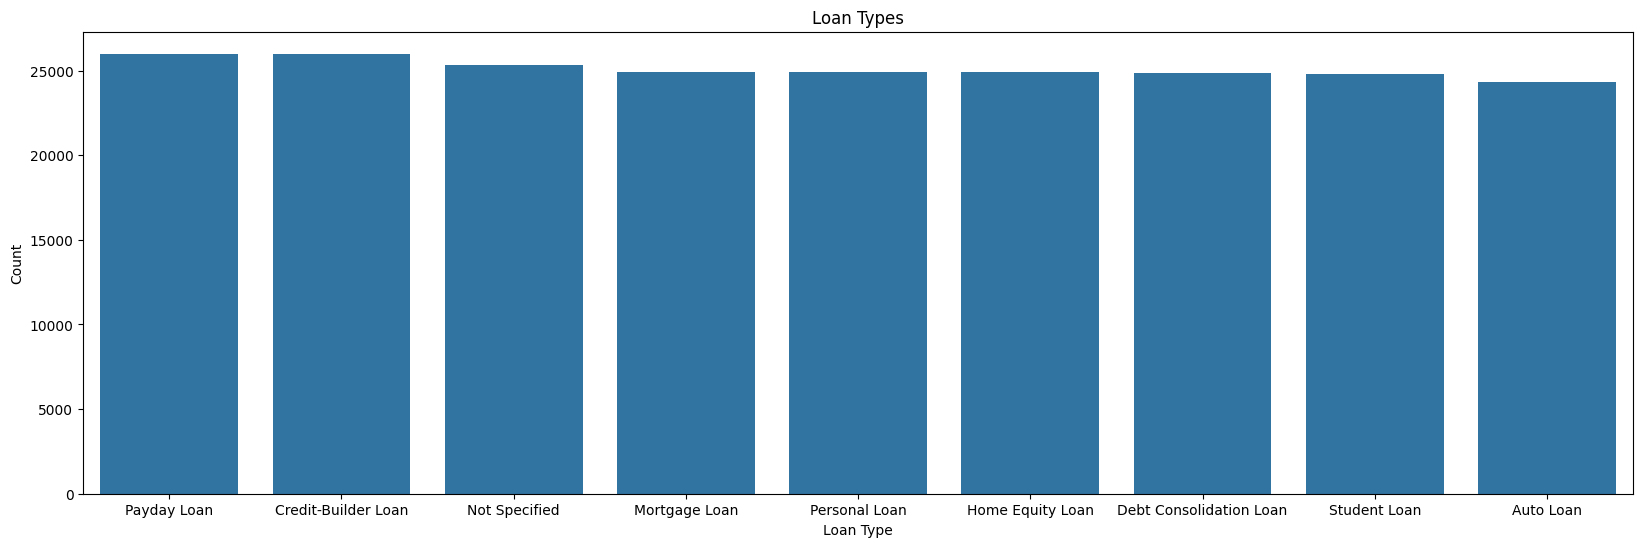

In [15]:
# Split the loan types and clean "and " from the beginning
df_loans = train_data[['Type_of_Loan']].copy()
df_loans['Type_of_Loan'] = df_loans['Type_of_Loan'].str.replace(r'\band ', '', regex=True)  # Remove 'and '
df_loans['Type_of_Loan'] = df_loans['Type_of_Loan'].str.split(', ')  # Split into list
df_loans = df_loans.explode('Type_of_Loan')  # Separate into rows

# Count occurrences of each loan type
loan_counts = df_loans['Type_of_Loan'].value_counts()
print(loan_counts)

# Plot the loan types
plt.figure(figsize=(20, 6))
sns.barplot(x=loan_counts.index, y=loan_counts.values)
plt.title('Loan Types')
plt.ylabel('Count')
plt.xlabel('Loan Type')


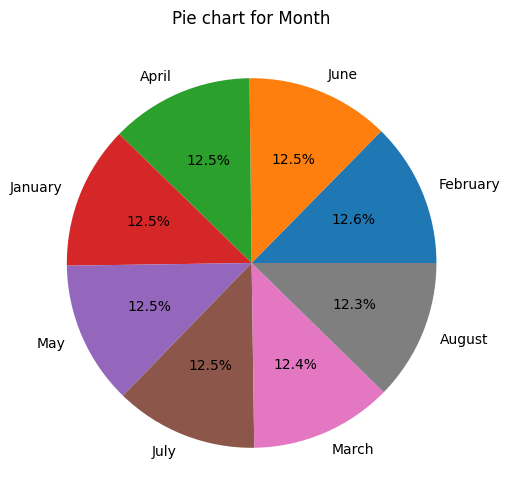

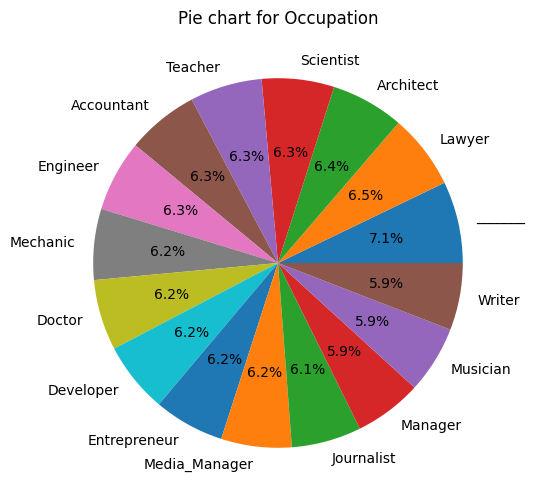

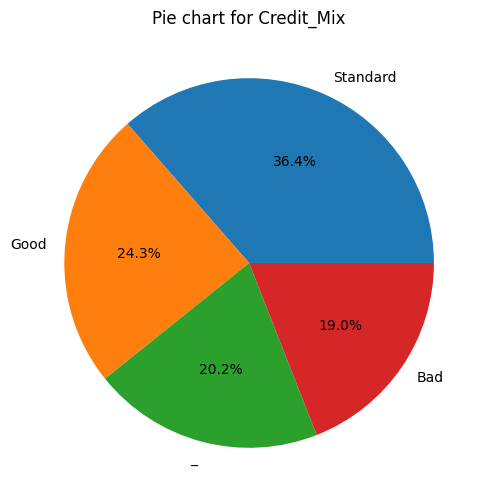

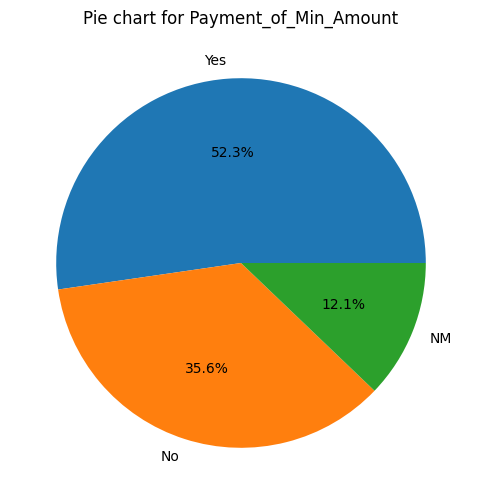

In [16]:
columns_to_plot = ['Month','Occupation','Credit_Mix','Payment_of_Min_Amount']
# 'Annual_Income', 'Num_of_Loan', 'Type_of_Loan'
for col in train_data[columns_to_plot]:
    plt.figure(figsize=(6, 6))
    train_data[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie chart for {col}')
    plt.ylabel('')  # Hide the y-label
    plt.show()


----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, dropping unwanted columns (such as IDs), etc. as needed to make sure it's ready for the model.

`Q` Is this dataset *skewed*?

`Note:` You can take a sample from the training data to make the model training and fine-tuning faster.

Hints:
- It could be helpful to check `sklearn.preprocessing` module.

## `i` train_data_set

In [17]:
train_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,54344.000000,64000.000000,64000.000000,64000.000000,64000.000000,62739.000000,64000.000000,64000.000000
mean,4189.977267,17.163484,22.458672,72.596641,21.092344,27.844945,32.284360,1386.545180
std,3183.396223,118.222030,129.047004,468.312666,14.861313,193.365007,5.123238,8226.664392
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.100770,0.000000
25%,1620.372708,3.000000,4.000000,8.000000,10.000000,3.000000,28.040380,30.015880
50%,3090.332500,6.000000,6.000000,13.000000,18.000000,6.000000,32.323633,69.246684
75%,5950.426667,7.000000,7.000000,20.000000,28.000000,9.000000,36.505625,160.528078
max,15204.633333,1798.000000,1499.000000,5797.000000,67.000000,2597.000000,49.522324,82256.000000


In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64000 entries, 41919 to 25475
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        64000 non-null  object 
 1   Customer_ID               64000 non-null  object 
 2   Month                     64000 non-null  object 
 3   Name                      57564 non-null  object 
 4   Age                       64000 non-null  object 
 5   SSN                       64000 non-null  object 
 6   Occupation                64000 non-null  object 
 7   Annual_Income             64000 non-null  object 
 8   Monthly_Inhand_Salary     54344 non-null  float64
 9   Num_Bank_Accounts         64000 non-null  int64  
 10  Num_Credit_Card           64000 non-null  int64  
 11  Interest_Rate             64000 non-null  int64  
 12  Num_of_Loan               64000 non-null  object 
 13  Type_of_Loan              56664 non-null  object 
 14  Delay_f

In [19]:
def preprocess_data_convert_to_numeric(df, drop_cols, int_cols, float_cols):
    """
    Preprocess the dataframe by dropping columns, converting columns to int and float.

    Parameters:
        df (pd.DataFrame): Input dataframe.
        drop_cols (list): Columns to drop.
        int_cols (list): Columns to convert to integers.
        float_cols (list): Columns to convert to floats.

    Returns:
        pd.DataFrame: Processed dataframe.
    """
    # Drop specified columns
    df = df.drop(columns=drop_cols, errors='ignore')

    # Convert columns to floats
    for col in float_cols:
        df[col] = df[col].astype(str).str.replace(r'[^0-9.]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float (handle errors)
        df[col] = df[col].round(6)

    # Convert columns to integers
    for col in int_cols:
        df[col] = df[col].astype(str).str.replace(r'[^0-9]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

    # # KNN Imputation for numerical data
    # knn_imputer = KNNImputer(n_neighbors=n_neighbors)
    # df[int_cols + float_cols] = knn_imputer.fit_transform(df[int_cols + float_cols])

   
    return df

In [20]:
# Here is my first overview that I want to convert these columns to the correct data types and drop some columns that are not useful for the model.
drop_cols = ['ID', 'Customer_ID', 'SSN', 'Name', 'Type_of_Loan']
int_cols = ['Age', 'Num_of_Loan', 'Num_of_Delayed_Payment']
float_cols = ['Annual_Income', 'Changed_Credit_Limit', 'Amount_invested_monthly', 'Outstanding_Debt', 'Monthly_Balance']

In [21]:
df = preprocess_data_convert_to_numeric(train_data, drop_cols, int_cols, float_cols)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64000 entries, 41919 to 25475
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     64000 non-null  object 
 1   Age                       64000 non-null  Int64  
 2   Occupation                64000 non-null  object 
 3   Annual_Income             64000 non-null  float64
 4   Monthly_Inhand_Salary     54344 non-null  float64
 5   Num_Bank_Accounts         64000 non-null  int64  
 6   Num_Credit_Card           64000 non-null  int64  
 7   Interest_Rate             64000 non-null  int64  
 8   Num_of_Loan               64000 non-null  Int64  
 9   Delay_from_due_date       64000 non-null  int64  
 10  Num_of_Delayed_Payment    59515 non-null  Int64  
 11  Changed_Credit_Limit      62701 non-null  float64
 12  Num_Credit_Inquiries      62739 non-null  float64
 13  Credit_Mix                64000 non-null  object 
 14  Outstan

In [23]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
41919,August,44,Journalist,17728.55,NaN,3,6,12,7,23,...,Standard,1493.28,23.680638,7 Years and 10 Months,Yes,63.722011,108.059973,Low_spent_Small_value_payments,274.755933,Standard
68150,July,32,Accountant,48276.66,4036.380342,6,7,9,4,30,...,Standard,945.79,28.841019,29 Years and 2 Months,No,252.798697,39.713757,High_spent_Large_value_payments,471.767704,Standard
4308,May,26,Media_Manager,18503.85,1634.987500,3,7,15,7,26,...,Standard,742.33,35.810230,16 Years and 3 Months,Yes,77.240964,98.945370,Low_spent_Small_value_payments,277.312416,Poor
52490,March,29,Entrepreneur,30411.90,2772.325000,845,6,11,6,9,...,_,2261.01,33.064260,8 Years and 3 Months,NM,112.753434,69.243696,High_spent_Small_value_payments,355.235370,Poor
83004,May,36,Teacher,50473.80,4144.150000,3,7,32,6,11,...,Standard,1316.91,39.605763,NaN,Yes,199.605722,NaN,High_spent_Medium_value_payments,408.806513,Standard


In [24]:
train_data = df

In [25]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.1)
    Q3 = df[col].quantile(0.9)
    # IQR = Q3 - Q1

    # lower_bound = Q1 
    # upper_bound = Q3 
    
    # Cap values
    df[col] = df[col].clip(Q1, Q3)
    return df

def cap_df_outliers(df): # for only numeric col
    df_num = df.select_dtypes(include=['float64', 'int64'])
    for col in df_num.columns:
        df = cap_outliers(df, col)
    return df

In [26]:
train_data = cap_df_outliers(train_data)

In [27]:
train_data.head(10)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
41919,August,44,Journalist,17728.55,NaN,3,6,12,7,23,...,Standard,1493.28,25.336676,7 Years and 10 Months,Yes,63.722011,108.059973,Low_spent_Small_value_payments,274.755933,Standard
68150,July,32,Accountant,48276.66,4036.380342,6,7,9,4,30,...,Standard,945.79,28.841019,29 Years and 2 Months,No,252.798697,43.914255,High_spent_Large_value_payments,471.767704,Standard
4308,May,26,Media_Manager,18503.85,1634.987500,3,7,15,7,26,...,Standard,742.33,35.810230,16 Years and 3 Months,Yes,77.240964,98.945370,Low_spent_Small_value_payments,277.312416,Poor
52490,March,29,Entrepreneur,30411.90,2772.325000,9,6,11,6,9,...,_,2261.01,33.064260,8 Years and 3 Months,NM,112.753434,69.243696,High_spent_Small_value_payments,355.235370,Poor
83004,May,36,Teacher,50473.80,4144.150000,3,7,29,6,11,...,Standard,1316.91,39.045390,NaN,Yes,199.605722,NaN,High_spent_Medium_value_payments,408.806513,Standard
50963,April,26,Entrepreneur,24858.67,1977.555833,8,6,11,2,26,...,Good,585.59,30.863372,15 Years and 5 Months,No,35.193365,73.288296,Low_spent_Large_value_payments,359.273922,Good
40866,March,36,Manager,15509.88,NaN,9,6,23,6,45,...,Standard,2664.21,36.868102,10 Years and 4 Months,Yes,74.041133,43.914255,High_spent_Medium_value_payments,255.624048,Poor
38321,February,19,Developer,14719.33,1289.070193,4,5,9,7,9,...,Standard,2421.78,37.495898,15 Years and 4 Months,Yes,148.108192,124.748406,Low_spent_Small_value_payments,229.145125,Poor
25638,July,29,Scientist,21353.19,1856.432500,4,7,5,0,16,...,Standard,1198.13,33.204724,33 Years and 5 Months,Yes,0.000000,44.733491,High_spent_Large_value_payments,380.909759,Standard
31442,March,50,Teacher,43885.43,3596.119167,2,3,11,2,16,...,Good,233.03,39.045390,29 Years and 9 Months,No,51.655833,145.608539,High_spent_Medium_value_payments,412.347545,Standard


In [28]:
train_data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,64000.0,64000.000000,54344.000000,64000.000000,64000.000000,64000.000000,64000.0,64000.000000,59515.0,62701.000000,62739.000000,64000.000000,64000.000000,64000.000000,61130.000000,63243.000000
mean,33.763562,49332.358847,4013.509559,5.499313,5.635359,14.766625,3.690641,20.438984,13.361287,10.129969,5.877030,1350.432805,32.257164,101.851326,200.180558,388.769336
std,10.212926,33294.347161,2686.200617,2.290624,1.903906,8.244341,2.489893,12.561730,5.52624,5.594086,3.626094,936.562130,4.657611,91.390452,167.014537,154.659589
min,19.0,14264.460000,1102.064583,2.000000,3.000000,4.000000,0.0,5.000000,4.0,2.400000,1.000000,233.030000,25.336676,0.000000,43.914255,218.308901
25%,25.0,19344.270000,1620.372708,3.000000,4.000000,8.000000,2.0,10.000000,9.0,5.360000,3.000000,569.222500,28.040380,30.015880,74.567588,270.249527
50%,34.0,37471.520000,3090.332500,6.000000,6.000000,13.000000,3.0,18.000000,14.0,9.430000,6.000000,1166.910000,32.323633,69.246684,135.607050,336.618808
75%,42.0,72760.040000,5950.426667,7.000000,7.000000,20.000000,6.0,28.000000,18.0,14.900000,9.000000,1948.980000,36.505625,160.528078,265.418225,469.563534
max,50.0,113196.540000,9127.950000,9.000000,9.000000,29.000000,8.0,45.000000,21.0,19.430000,12.000000,3192.940000,39.045390,285.271304,570.912849,706.947415


In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64000 entries, 41919 to 25475
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     64000 non-null  object 
 1   Age                       64000 non-null  Int64  
 2   Occupation                64000 non-null  object 
 3   Annual_Income             64000 non-null  float64
 4   Monthly_Inhand_Salary     54344 non-null  float64
 5   Num_Bank_Accounts         64000 non-null  int64  
 6   Num_Credit_Card           64000 non-null  int64  
 7   Interest_Rate             64000 non-null  int64  
 8   Num_of_Loan               64000 non-null  Int64  
 9   Delay_from_due_date       64000 non-null  int64  
 10  Num_of_Delayed_Payment    59515 non-null  Int64  
 11  Changed_Credit_Limit      62701 non-null  float64
 12  Num_Credit_Inquiries      62739 non-null  float64
 13  Credit_Mix                64000 non-null  object 
 14  Outstan

In [30]:
def preprocess_data_map_payment_behaviour(df):
    """
    - Drops rows where Payment_Behaviour is unknown if its percentage is low.
    - Splits Payment_Behaviour into Spending_Level and Payment_Size.
    - Returns the cleaned DataFrame.
    """
    # Define mapping
    mapping = {
        "Low_spent_Small_value_payments": [0, 0],
        "Low_spent_Medium_value_payments": [0, 1],
        "Low_spent_Large_value_payments": [0, 2],
        "High_spent_Small_value_payments": [2, 0],
        "High_spent_Medium_value_payments": [2, 1],
        "High_spent_Large_value_payments": [2, 2],
        "!@9#%8" : [1,1]  # assumption
    }

    # Drop unknown values if they are rare
    # df = df[df["Payment_Behaviour"] != "!@9#%8"]

    # Map values
    df[["Spending_Level", "Payment_Size"]] = df["Payment_Behaviour"].map(mapping).apply(pd.Series)

    # Drop original column
    df.drop(columns=["Payment_Behaviour"], inplace=True)

    return df

In [31]:
train_data = preprocess_data_map_payment_behaviour(train_data)
train_data.head(2)

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_Level,Payment_Size
41919,August,44,Journalist,17728.55,NaN,3,6,12,7,23,...,1493.28,25.336676,7 Years and 10 Months,Yes,63.722011,108.059973,274.755933,Standard,0,0
68150,July,32,Accountant,48276.66,4036.380342,6,7,9,4,30,...,945.79,28.841019,29 Years and 2 Months,No,252.798697,43.914255,471.767704,Standard,2,2


In [32]:
def preprocess_data_calculate_total_months(df):
    """
    Converts 'Credit_History_Age' from 'X Years and Y Months' to total months.
    Handles missing values and replaces zeros with the average.
    """
    df['Credit_History_Age'] = df['Credit_History_Age'].fillna('0 Years and 0 Months')

    df[['Years', 'Months']] = df['Credit_History_Age'].str.extract(r'(\d+) Years and (\d+) Months').fillna(0).astype(int)

    df['Total_Months'] = df['Years'] * 12 + df['Months']

    mean_value = df['Total_Months'][df['Total_Months'] > 0].median()  # Avoid using zeros in mean calculation
    df.loc[df['Total_Months'] == 0, 'Total_Months'] = mean_value

    df = df.drop(['Years','Months',  'Credit_History_Age'],axis = 1)
    
    return df

In [33]:
train_data = preprocess_data_calculate_total_months(train_data)
train_data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_Level,Payment_Size,Total_Months
41919,August,44,Journalist,17728.55,NaN,3,6,12,7,23,...,1493.28,25.336676,Yes,63.722011,108.059973,274.755933,Standard,0,0,94
68150,July,32,Accountant,48276.66,4036.380342,6,7,9,4,30,...,945.79,28.841019,No,252.798697,43.914255,471.767704,Standard,2,2,350
4308,May,26,Media_Manager,18503.85,1634.987500,3,7,15,7,26,...,742.33,35.810230,Yes,77.240964,98.945370,277.312416,Poor,0,0,195
52490,March,29,Entrepreneur,30411.90,2772.325000,9,6,11,6,9,...,2261.01,33.064260,NM,112.753434,69.243696,355.235370,Poor,2,0,99
83004,May,36,Teacher,50473.80,4144.150000,3,7,29,6,11,...,1316.91,39.045390,Yes,199.605722,NaN,408.806513,Standard,2,1,219


In [34]:
train_data.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_Score', 'Spending_Level', 'Payment_Size', 'Total_Months'],
      dtype='object')

In [35]:
train_data.isnull().sum().sort_values(ascending=False)

Monthly_Inhand_Salary       9656
Num_of_Delayed_Payment      4485
Amount_invested_monthly     2870
Changed_Credit_Limit        1299
Num_Credit_Inquiries        1261
Monthly_Balance              757
Occupation                     0
Month                          0
Interest_Rate                  0
Num_Credit_Card                0
Num_Bank_Accounts              0
Annual_Income                  0
Age                            0
Credit_Mix                     0
Num_of_Loan                    0
Delay_from_due_date            0
Credit_Utilization_Ratio       0
Outstanding_Debt               0
Total_EMI_per_month            0
Payment_of_Min_Amount          0
Credit_Score                   0
Spending_Level                 0
Payment_Size                   0
Total_Months                   0
dtype: int64

In [36]:
def preprocess_data_knn(df, label_encoders=None, imputer=None, k=5, train=True):
    """
    Preprocesses data using KNN Imputation and Label Encoding.
    
    Parameters:
        df (pd.DataFrame): Input DataFrame.
        label_encoders (dict): Pre-fitted LabelEncoders (if train=False).
        imputer (KNNImputer): Pre-fitted KNNImputer (if train=False).
        k (int): Number of neighbors for KNN.
        train (bool): If True, fit encoders and imputer; else, transform only.
    
    Returns:
        pd.DataFrame: Processed DataFrame.
        dict: Trained LabelEncoders (only if train=True).
        KNNImputer: Trained KNNImputer (only if train=True).
    """
    df_copy = df.copy()
    
    # Identify column types
    cat_col = df_copy.select_dtypes(include=['object']).columns.tolist()
    int_col = df_copy.select_dtypes(include=['int64', 'Int64']).columns.tolist()
    float_col = df_copy.select_dtypes(include=['float64']).columns.tolist()


    # Step 1: Handle infinite and extremely large values
    for col in int_col + float_col:
        # Replace infinite values with NaN
        df_copy[col] = df_copy[col].replace([np.inf, -np.inf], np.nan)
        
        # Cap extremely large values to a reasonable range
        if df_copy[col].dtype == 'float64':
            max_value = np.finfo('float64').max  # Maximum value for float64
            df_copy[col] = df_copy[col].clip(lower=-max_value, upper=max_value)

            
    # Label Encoding
    if train:
        label_encoders = {}
        for col in cat_col:
            le = LabelEncoder()
            df_copy[col] = le.fit_transform(df_copy[col].astype(str))
            label_encoders[col] = le
    else:
        for col in cat_col:
            df_copy[col] = label_encoders[col].transform(df_copy[col].astype(str))

    # KNN Imputation
    if train:
        imputer = KNNImputer(n_neighbors=k)
        df_copy[int_col + float_col] = imputer.fit_transform(df_copy[int_col + float_col])
    else:
        df_copy[int_col + float_col] = imputer.transform(df_copy[int_col + float_col])

    # Ensure integer columns remain integers & float remains floats
    df_copy[int_col] = df_copy[int_col].round().astype('Int64')
    df_copy[float_col] = df_copy[float_col].round(6)

    if train:
        return df_copy, label_encoders, imputer
    else:
        return df_copy
    

In [37]:
train_data, label_encoders, imputer = preprocess_data_knn(train_data,  train=True)
train_data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_Level,Payment_Size,Total_Months
41919,1,44,6,17728.55,1585.887167,3,6,12,7,23,...,1493.28,25.336676,2,63.722011,108.059973,274.755933,2,0,0,94
68150,4,32,0,48276.66,4036.380342,6,7,9,4,30,...,945.79,28.841019,1,252.798697,43.914255,471.767704,2,2,2,350
4308,7,26,10,18503.85,1634.987500,3,7,15,7,26,...,742.33,35.810230,2,77.240964,98.945370,277.312416,1,0,0,195
52490,6,29,5,30411.90,2772.325000,9,6,11,6,9,...,2261.01,33.064260,0,112.753434,69.243696,355.235370,1,2,0,99
83004,7,36,13,50473.80,4144.150000,3,7,29,6,11,...,1316.91,39.045390,2,199.605722,90.385813,408.806513,2,2,1,219


In [38]:
label_encoders, imputer

({'Month': LabelEncoder(),
  'Occupation': LabelEncoder(),
  'Credit_Mix': LabelEncoder(),
  'Payment_of_Min_Amount': LabelEncoder(),
  'Credit_Score': LabelEncoder()},
 KNNImputer())

In [39]:
train_data.isnull().sum().sort_values(ascending=False)

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Spending_Level              0
Payment_Size                0
Total_Months                0
dtype: int64

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64000 entries, 41919 to 25475
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     64000 non-null  int64  
 1   Age                       64000 non-null  Int64  
 2   Occupation                64000 non-null  int64  
 3   Annual_Income             64000 non-null  float64
 4   Monthly_Inhand_Salary     64000 non-null  float64
 5   Num_Bank_Accounts         64000 non-null  Int64  
 6   Num_Credit_Card           64000 non-null  Int64  
 7   Interest_Rate             64000 non-null  Int64  
 8   Num_of_Loan               64000 non-null  Int64  
 9   Delay_from_due_date       64000 non-null  Int64  
 10  Num_of_Delayed_Payment    64000 non-null  Int64  
 11  Changed_Credit_Limit      64000 non-null  float64
 12  Num_Credit_Inquiries      64000 non-null  float64
 13  Credit_Mix                64000 non-null  int64  
 14  Outstan

In [41]:
train_data.describe()   

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_Level,Payment_Size,Total_Months
count,64000.000000,64000.0,64000.000000,64000.000000,64000.000000,64000.0,64000.0,64000.0,64000.0,64000.0,...,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.000000,64000.0,64000.0,64000.0
mean,3.500953,33.763562,7.529797,49332.358847,4014.239031,5.499313,5.635359,14.766625,3.690641,20.438984,...,1350.432805,32.257164,1.401453,101.851326,200.109938,388.325330,1.352781,0.924922,0.868172,220.876625
std,2.290317,10.212926,4.650055,33294.347161,2685.365307,2.290624,1.903906,8.244341,2.489893,12.56173,...,936.562130,4.657611,0.695173,91.390452,165.276535,154.216182,0.764030,0.95898,0.771336,95.044942
min,0.000000,19.0,0.000000,14264.460000,1102.064583,2.0,3.0,4.0,0.0,5.0,...,233.030000,25.336676,0.000000,0.000000,43.914255,218.308901,0.000000,0.0,0.0,1.0
25%,2.000000,25.0,3.000000,19344.270000,1619.995417,3.0,4.0,8.0,2.0,10.0,...,569.222500,28.040380,1.000000,30.015880,75.819485,270.192911,1.000000,0.0,0.0,154.0
50%,3.000000,34.0,7.000000,37471.520000,3088.475000,6.0,6.0,13.0,3.0,18.0,...,1166.910000,32.323633,2.000000,69.246684,137.159193,336.479036,2.000000,0.0,1.0,219.0
75%,5.000000,42.0,12.000000,72760.040000,5951.373333,7.0,7.0,20.0,6.0,28.0,...,1948.980000,36.505626,2.000000,160.528078,265.287000,468.577320,2.000000,2.0,1.0,292.0
max,7.000000,50.0,15.000000,113196.540000,9127.950000,9.0,9.0,29.0,8.0,45.0,...,3192.940000,39.045390,2.000000,285.271304,570.912849,706.947415,2.000000,2.0,2.0,404.0


In [42]:
train_data_features = train_data.drop(columns=['Credit_Score'])
train_data_target = train_data['Credit_Score']

## `ii` valid_data_set

In [43]:
valid_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
26938,0xb3d8,CUS_0x20e5,March,Goldsteind,38,107-23-3924,Manager,99845.4,8600.450000,1,...,_,778.1,33.209621,20 Years and 7 Months,No,136.474227,165.55405808676662,!@9#%8,808.0167149242363,Standard
20901,0x9077,CUS_0x734a,June,Alexei Oreskovicd,20,549-24-0925,Developer,36349.28,2885.106667,6,...,_,2195.84,39.668454,10 Years and 6 Months,Yes,72.660803,65.79055052751202,High_spent_Medium_value_payments,400.0593133101184,Poor
84873,0x2074f,CUS_0x9f3,February,Kateh,27,081-10-2427,Teacher,28276.43,2146.369167,480,...,Good,377.23,36.544880,22 Years and 9 Months,No,14.016662,87.59530995771433,High_spent_Medium_value_payments,363.02494429791517,Good
84382,0x2046c,CUS_0x717a,July,Soyoungj,47,417-48-6289,Doctor,75408.44,6403.036667,0,...,Good,1487.63,39.902031,22 Years and 4 Months,No,102.566178,272.2250239669127,Low_spent_Medium_value_payments,545.5124649718755,Standard
74876,0x1ccba,CUS_0xa631,May,Kima,45,791-69-8926,Teacher,15428.39,1405.699167,8,...,Bad,2664.61,26.565160,17 Years and 0 Months,Yes,14.295989,49.58086073330782,Low_spent_Small_value_payments,366.693066727166,Poor


In [44]:
valid_data = preprocess_data_convert_to_numeric(valid_data, drop_cols, int_cols, float_cols)
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 26938 to 83878
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     16000 non-null  object 
 1   Age                       16000 non-null  Int64  
 2   Occupation                16000 non-null  object 
 3   Annual_Income             16000 non-null  float64
 4   Monthly_Inhand_Salary     13583 non-null  float64
 5   Num_Bank_Accounts         16000 non-null  int64  
 6   Num_Credit_Card           16000 non-null  int64  
 7   Interest_Rate             16000 non-null  int64  
 8   Num_of_Loan               16000 non-null  Int64  
 9   Delay_from_due_date       16000 non-null  int64  
 10  Num_of_Delayed_Payment    14899 non-null  Int64  
 11  Changed_Credit_Limit      15653 non-null  float64
 12  Num_Credit_Inquiries      15706 non-null  float64
 13  Credit_Mix                16000 non-null  object 
 14  Outstan

In [45]:
valid_data = cap_df_outliers(valid_data)
# valid_data.head()

valid_data = preprocess_data_map_payment_behaviour(valid_data)

valid_data = preprocess_data_calculate_total_months(valid_data)

valid_data= preprocess_data_knn(valid_data, label_encoders, imputer, train=False)

valid_data.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_Level,Payment_Size,Total_Months
26938,6,38,8,99845.40,8600.450000,2,3,11,2,10,...,778.10,33.209621,1,136.474227,165.554058,703.952032,2,1,1,247
20901,5,20,2,36349.28,2885.106667,6,8,26,4,21,...,2195.84,38.948090,2,72.660803,65.790551,400.059313,1,2,1,126
84873,2,27,13,28276.43,2146.369167,9,5,8,1,5,...,377.23,36.544880,1,14.016662,87.595310,363.024944,0,2,1,273
84382,4,47,3,75408.44,6403.036667,2,3,6,3,13,...,1487.63,38.948090,1,102.566178,272.225024,545.512465,2,0,1,268
74876,7,45,13,15428.39,1405.699167,8,8,29,2,28,...,2664.61,26.565160,2,14.295989,49.580861,366.693067,1,0,0,204


In [46]:
valid_data.isnull().sum().sort_values(ascending=False)

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Spending_Level              0
Payment_Size                0
Total_Months                0
dtype: int64

In [47]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 26938 to 83878
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     16000 non-null  int64  
 1   Age                       16000 non-null  Int64  
 2   Occupation                16000 non-null  int64  
 3   Annual_Income             16000 non-null  float64
 4   Monthly_Inhand_Salary     16000 non-null  float64
 5   Num_Bank_Accounts         16000 non-null  Int64  
 6   Num_Credit_Card           16000 non-null  Int64  
 7   Interest_Rate             16000 non-null  Int64  
 8   Num_of_Loan               16000 non-null  Int64  
 9   Delay_from_due_date       16000 non-null  Int64  
 10  Num_of_Delayed_Payment    16000 non-null  Int64  
 11  Changed_Credit_Limit      16000 non-null  float64
 12  Num_Credit_Inquiries      16000 non-null  float64
 13  Credit_Mix                16000 non-null  int64  
 14  Outstan

In [48]:
valid_data.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_Level,Payment_Size,Total_Months
count,16000.000000,16000.0,16000.000000,16000.000000,16000.000000,16000.0,16000.0,16000.0,16000.0,16000.0,...,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.0,16000.0,16000.0
mean,3.516688,33.87375,7.512125,49251.684657,4026.382989,5.480313,5.620625,14.679063,3.698125,20.357437,...,1341.658814,32.181140,1.399625,102.754230,201.271937,387.278211,1.361938,0.926937,0.880625,221.771125
std,2.283566,10.499813,4.616377,32872.828865,2668.867063,2.288381,1.902972,8.209797,2.48639,12.573919,...,930.497783,4.641222,0.692698,92.131783,167.513571,153.704384,0.764101,0.95814,0.771629,95.256754
min,0.000000,19.0,0.000000,14382.551000,1102.064583,2.0,3.0,4.0,0.0,5.0,...,228.530000,25.310999,0.000000,0.000000,43.820225,217.162672,0.000000,0.0,0.0,2.0
25%,2.000000,25.0,4.000000,19749.315000,1652.351416,3.0,4.0,7.0,2.0,10.0,...,563.840000,27.966150,1.000000,30.677206,76.210492,269.933178,1.000000,0.0,0.0,155.0
50%,4.000000,33.0,7.000000,37618.300000,3106.770833,6.0,5.0,13.0,3.0,18.0,...,1154.300000,32.216183,2.000000,68.902912,138.559908,335.879520,2.000000,1.0,1.0,220.0
75%,6.000000,43.0,12.000000,72339.165000,5955.807500,7.0,7.0,20.0,6.0,28.0,...,1953.100000,36.452198,2.000000,163.172484,263.683291,467.948351,2.000000,2.0,1.0,293.0
max,7.000000,51.0,15.000000,112287.547000,9127.950000,9.0,9.0,29.0,8.0,45.0,...,3158.117000,38.948090,2.000000,286.972184,581.566567,706.947415,2.000000,2.0,2.0,404.0


In [49]:
valid_data_featuers = valid_data.drop('Credit_Score', axis=1)
valid_data_target = valid_data['Credit_Score']

## `iii` test_data_set

In [50]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 13504 to 2557
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20000 non-null  object 
 1   Customer_ID               20000 non-null  object 
 2   Month                     20000 non-null  object 
 3   Name                      17975 non-null  object 
 4   Age                       20000 non-null  object 
 5   SSN                       20000 non-null  object 
 6   Occupation                20000 non-null  object 
 7   Annual_Income             20000 non-null  object 
 8   Monthly_Inhand_Salary     17071 non-null  float64
 9   Num_Bank_Accounts         20000 non-null  int64  
 10  Num_Credit_Card           20000 non-null  int64  
 11  Interest_Rate             20000 non-null  int64  
 12  Num_of_Loan               20000 non-null  object 
 13  Type_of_Loan              17701 non-null  object 
 14  Delay_fr

In [51]:
test_data = preprocess_data_convert_to_numeric(test_data, drop_cols, int_cols, float_cols)

test_data = cap_df_outliers(test_data)

test_data = preprocess_data_map_payment_behaviour(test_data)

test_data = preprocess_data_calculate_total_months(test_data)

test_data= preprocess_data_knn(test_data, label_encoders, imputer, train=False)


In [52]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 13504 to 2557
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     20000 non-null  int64  
 1   Age                       20000 non-null  Int64  
 2   Occupation                20000 non-null  int64  
 3   Annual_Income             20000 non-null  float64
 4   Monthly_Inhand_Salary     20000 non-null  float64
 5   Num_Bank_Accounts         20000 non-null  Int64  
 6   Num_Credit_Card           20000 non-null  Int64  
 7   Interest_Rate             20000 non-null  Int64  
 8   Num_of_Loan               20000 non-null  Int64  
 9   Delay_from_due_date       20000 non-null  Int64  
 10  Num_of_Delayed_Payment    20000 non-null  Int64  
 11  Changed_Credit_Limit      20000 non-null  float64
 12  Num_Credit_Inquiries      20000 non-null  float64
 13  Credit_Mix                20000 non-null  int64  
 14  Outstand

In [53]:
test_data.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Spending_Level,Payment_Size,Total_Months
count,20000.000000,20000.0,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.0,20000.0,20000.0,...,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.0,20000.0,20000.0
mean,3.483600,33.8392,7.511850,49633.565722,4035.281130,5.4921,5.6066,14.7598,3.6861,20.4151,...,1345.536308,32.314095,1.41160,102.778217,203.893371,390.579421,1.348850,0.9388,0.882,220.9262
std,2.300608,10.266763,4.628297,33386.006346,2687.214991,2.297912,1.892331,8.219889,2.497054,12.587216,...,938.040907,4.637486,0.68812,92.301415,172.189744,156.789594,0.768364,0.957497,0.767402,95.317558
min,0.000000,19.0,0.000000,14320.270000,1102.064583,2.0,3.0,4.0,0.0,5.0,...,225.860000,25.382713,0.00000,0.000000,43.914255,218.308901,0.000000,0.0,0.0,2.0
25%,1.000000,25.0,4.000000,19493.510000,1626.719792,3.0,4.0,8.0,2.0,10.0,...,559.230000,28.153121,1.00000,31.016951,75.939347,269.787279,1.000000,0.0,0.0,153.0
50%,3.000000,34.0,7.000000,37929.550000,3119.696667,6.0,5.0,14.0,3.0,18.0,...,1169.405000,32.319165,2.00000,69.494048,137.794223,337.696406,2.000000,1.0,1.0,220.0
75%,6.000000,43.0,12.000000,73085.960000,5988.617828,7.0,7.0,20.0,6.0,28.0,...,1941.540000,36.496194,2.00000,162.343223,267.608592,472.030426,2.000000,2.0,1.0,292.0
max,7.000000,50.0,15.000000,113368.230000,9127.950000,9.0,9.0,29.0,8.0,45.0,...,3193.066000,39.096392,2.00000,288.253380,594.434989,714.961759,2.000000,2.0,2.0,404.0


In [54]:
test_data_featuers = test_data.drop('Credit_Score', axis=1)
test_data_target = test_data['Credit_Score']

----------------------

# `05` Model Training

In [55]:
# Dropout import
from keras.layers import Dropout

In [56]:
train_data_target_categorical = to_categorical(train_data_target)
valid_data_target_categorical = to_categorical(valid_data_target)
test_data_target_categorical = to_categorical(test_data_target)

train_data_features = train_data_features.astype({col: 'int' for col in train_data_features.select_dtypes(include='Int64').columns})
valid_data_featuers = valid_data_featuers.astype({col: 'int' for col in valid_data_featuers.select_dtypes(include='Int64').columns})
test_data_featuers = test_data_featuers.astype({col: 'int' for col in test_data_featuers.select_dtypes(include='Int64').columns})

In [57]:
from sklearn.preprocessing import MinMaxScaler 
# Normalization
scaler = MinMaxScaler()

train_data_features = scaler.fit_transform(train_data_features)
valid_data_featuers = scaler.transform(valid_data_featuers)
test_data_featuers = scaler.transform(test_data_featuers)



In [58]:
model = Sequential()
model.add(Dense(64, input_dim=train_data_features.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

/home/israa/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1742798726.225680   69966 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1742798726.226021   69966 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [59]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'precision'])


In [60]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(train_data_features, train_data_target_categorical, epochs=100, batch_size=32, validation_data=(valid_data_featuers, valid_data_target_categorical), callbacks=[early_stopping])


Epoch 1/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5487 - loss: 0.9181 - precision: 0.5704 - val_accuracy: 0.6555 - val_loss: 0.7508 - val_precision: 0.7093
Epoch 2/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6435 - loss: 0.7730 - precision: 0.6900 - val_accuracy: 0.6672 - val_loss: 0.7287 - val_precision: 0.7204
Epoch 3/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6525 - loss: 0.7578 - precision: 0.7012 - val_accuracy: 0.6736 - val_loss: 0.7211 - val_precision: 0.7262
Epoch 4/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6550 - loss: 0.7469 - precision: 0.7053 - val_accuracy: 0.6744 - val_loss: 0.7128 - val_precision: 0.7159
Epoch 5/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6708 - loss: 0.7296 - precision: 0.7104 - val_accuracy: 0.6866 - val_loss: 0.7045 - val_precision: 0.7400
Epoch 6/100
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6675 - loss: 0.7310 - precision: 0.7094 - val_accuracy: 

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training Accuracy: 0.71
Validation Accuracy: 0.71
Test Accuracy: 0.70


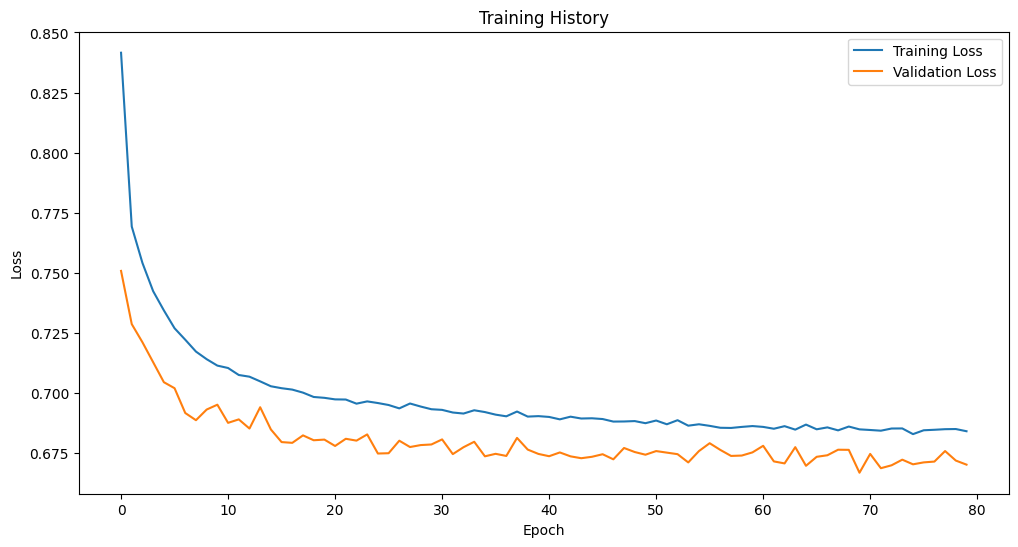

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Evaluate the model
train_pred = model.predict(train_data_features)
valid_pred = model.predict(valid_data_featuers)
test_pred = model.predict(test_data_featuers)

train_pred = [np.argmax(pred) for pred in train_pred]
valid_pred = [np.argmax(pred) for pred in valid_pred]
test_pred = [np.argmax(pred) for pred in test_pred]

train_accuracy = accuracy_score(train_data_target, train_pred)
valid_accuracy = accuracy_score(valid_data_target, valid_pred)
test_accuracy = accuracy_score(test_data_target, test_pred)


print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Validation Accuracy: {valid_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')


In [62]:
predictions = model.predict(test_data_featuers)
predictions = [np.argmax(pred) for pred in predictions]

print(classification_report(test_data_target, predictions))

  1/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.58      0.63      0.61      3632
           1       0.73      0.65      0.68      5759
           2       0.73      0.76      0.74     10609

    accuracy                           0.70     20000
   macro avg       0.68      0.68      0.68     20000
weighted avg       0.70      0.70      0.70     20000



----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$